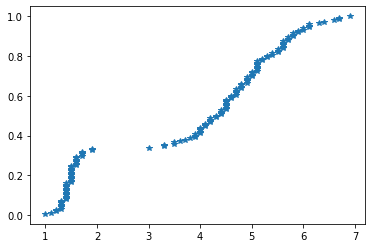

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# df=pd.DataFrame(load_iris())
df=load_iris(as_frame=True)
X=df.data
y=df.target
names=df.target_names
X['species']=df.target
X.species.replace({0:names[0], 1:names[1], 2:names[2]}, inplace=True)


petal_len=X['petal length (cm)']

def efcd(petal_len):
    n=len(petal_len)
    x=np.sort(petal_len)
    y=np.arange(1,n+1)/n
    return x,y


x_vers, y_vers=efcd(petal_len)
plt.plot(x_vers, y_vers, marker='*', linestyle='none')




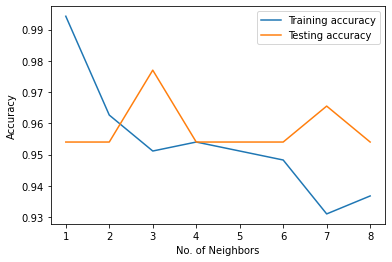

0.9540229885057471

In [7]:
# *******************************************CLASSIFICATION
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df=pd.read_csv("https://raw.githubusercontent.com/justkacz/csvfiles/main/house-votes-84.csv", header=None, names=['party','handicapped-infants',
'water-project-cost-sharing',
'adoption-of-the-budget-resolution',
'physician-fee-freeze',
'el-salvador-aid',
'religious-groups-in-schools',
'anti-satellite-test-ban',
'aid-to-nicaraguan-contras',
'mx-missile',
'immigration',
'synfuels-corporation-cutback',
'education-spending',
'superfund-right-to-sue',
'crime',
'duty-free-exports',
'export-administration-act-south-africa'
])
df

df.replace({'?': None, 'n':0, 'y':1}, inplace=True)
df.fillna(method='ffill', inplace=True)
df.fillna(1, inplace=True) # remained one item where NaN was in the first row
df.isna().sum()
x=df.drop('party', axis=1).values
# # x = np.where(x=='n', 0, 1)
Y=df.party.values

x_train, x_test, Y_train, Y_test = train_test_split(x,Y, test_size=0.2, random_state=42, stratify=Y)

# # np.sum([x=='?'],axis=1)

# # np.unique(x)

# verifying the accuracy score for train and test datasets with different neighbors - overfitting (very good result for training, bad for test dataset):
neighbors=np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i, k in enumerate(neighbors):
        model=KNeighborsClassifier(n_neighbors=k)
        model.fit(x_train, Y_train)
        train_accuracy[i]=model.score(x_train, Y_train)
        test_accuracy[i]=model.score(x_test, Y_test)
        

plt.plot(neighbors, train_accuracy, label="Training accuracy")
plt.plot(neighbors, test_accuracy, label="Testing accuracy")
plt.legend()
plt.xlabel("No. of Neighbors")
plt.ylabel("Accuracy")
plt.show()

# or:        
predictions=model.predict(x_test)
accuracy=accuracy_score(Y_test, predictions)
accuracy

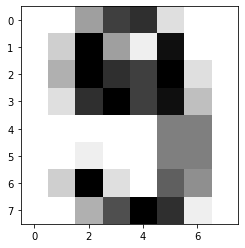

0.9833333333333333

In [78]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

digits=datasets.load_digits()
digits.keys()
digits.images.shape
digits.data.shape

plt.imshow(digits.images[1020], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

X=digits.data
y=digits.target

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model=KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)
# model.score(X_test, y_test) or:

predictions=model.predict(X_test)
accuracy=accuracy_score(y_test, predictions)
accuracy